In [1]:
import os
import pandas as pd
import save_and_load

path = "."  #absolute or relative path to the folder containing the file. 
            #"." for current folder

#read and print values from the dataset to check if it imported correctly
filename_read = os.path.join(path, "pokemon.csv")
df = pd.read_csv(filename_read)
decodeddf = df
print(df[0:5])
#df = df.sample(frac=1).reset_index(drop=True)
#print(df[0:5])

   pokedex_number        Name  Type1   Type2  hp  height_m  weight_kg  attack  \
0               1   bulbasaur  Grass  Poison  45       0.7        6.9      49   
1               2     ivysaur  Grass  Poison  60       1.0       13.0      62   
2               3    venusaur  Grass  Poison  80       2.0      100.0     100   
3               4  charmander   Fire     NaN  39       0.6        8.5      52   
4               5  charmeleon   Fire     NaN  58       1.1       19.0      64   

   defense  speed  sp_attack  sp_defense   classfication  generation  \
0       49     45         65          65    Seed Pok�mon           1   
1       63     60         80          80    Seed Pok�mon           1   
2      123     80        122         120    Seed Pok�mon           1   
3       43     65         60          50  Lizard Pok�mon           1   
4       58     80         80          65   Flame Pok�mon           1   

   is_legendary  
0             0  
1             0  
2             0  
3       

In [2]:
#taken from tutorial 3
#df = df.select_dtypes(include=['int', 'float'])

#encode target names to integers
#https://stackoverflow.com/questions/49037286/pandas-string-values-encoding
from sklearn.preprocessing import LabelEncoder
import numpy as np

print(df['Type1'][0:20])

le = LabelEncoder()
df['Type1'] = le.fit_transform(df['Type1'])

testingdf = df[0:721]
holdoutdf = df[722:890]
print(testingdf['Type1'][0:20])

0      Grass
1      Grass
2      Grass
3       Fire
4       Fire
5       Fire
6      Water
7      Water
8      Water
9        Bug
10       Bug
11       Bug
12       Bug
13       Bug
14       Bug
15    Flying
16    Flying
17    Flying
18    Normal
19    Normal
Name: Type1, dtype: object
0      9
1      9
2      9
3      6
4      6
5      6
6     17
7     17
8     17
9      0
10     0
11     0
12     0
13     0
14     0
15     7
16     7
17     7
18    12
19    12
Name: Type1, dtype: int32


In [3]:
#collect the columns names for non-target features
result = []
for x in testingdf.columns:
    if (x == 'attack') or (x == 'defense') or (x == 'speed') or (x == 'sp_defense') or (x == 'sp_attack') or (x == 'weight_kg') or (x == 'height_m') or (x == 'hp'):
        result.append(x)

#get data (often called X) and target (often calle y) and display its shape
X = testingdf[result].values
yalt = testingdf['Type1'].values
print(X.shape)
print(yalt.shape)

from tensorflow import keras

y = keras.utils.to_categorical(testingdf['Type1'].to_numpy())

print(y.shape)

(721, 8)
(721,)
(721, 18)


In [4]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
"""
X_train, X_test, y_train, y_test = train_test_split(X, yalt, test_size=0.15, random_state=4)

# Create a Perceptron, with its training parameters
ppn = Perceptron(max_iter=100,tol=0.001,eta0=1)

# Train the model
ppn.fit(X_train,y_train)

# Make predication
y_pred = ppn.predict(X_test)

# Evaluate accuracy
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))"""

"\nX_train, X_test, y_train, y_test = train_test_split(X, yalt, test_size=0.15, random_state=4)\n\n# Create a Perceptron, with its training parameters\nppn = Perceptron(max_iter=100,tol=0.001,eta0=1)\n\n# Train the model\nppn.fit(X_train,y_train)\n\n# Make predication\ny_pred = ppn.predict(X_test)\n\n# Evaluate accuracy\nprint('Accuracy: %.2f' % accuracy_score(y_test, y_pred))"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

# make a sequential model and train it using KFold splits
# has 0 hidden layers
model = Sequential()
model.add(Dense(300, input_dim=X.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

kf = KFold(6)

for train, test in kf.split(X):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    model.fit(X_train,y_train,verbose=0,epochs=128)
    pred = model.predict(X_test)
    pred = np.argmax(pred,axis=1)
    y_compare = np.argmax(y_test,axis=1) 
    score = metrics.accuracy_score(y_compare, pred)
    print("Accuracy score: {}".format(score))

# save the model
save_and_load.save_model(model, path, "seqKFold")

Accuracy score: 0.21487603305785125
Accuracy score: 0.30833333333333335
Accuracy score: 0.26666666666666666
Accuracy score: 0.36666666666666664
Accuracy score: 0.4166666666666667
Accuracy score: 0.3416666666666667
Save model? y/n : y


In [6]:

# make a prediction using all the data
pred = model.predict(X) 
#show the shape if the inputs
print(pred.shape)
print(y.shape)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y,axis=1) 
#print the accuracy of the model
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

#plot a confusion matrix for the predicitons
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
"""
cm = confusion_matrix(y_compare, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
"""

(721, 18)
(721, 18)
Accuracy score: 0.7142857142857143


"\ncm = confusion_matrix(y_compare, pred)\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot()\nplt.ylabel('True label')\nplt.xlabel('Predicted label')\nplt.show()\n"

In [7]:
"""
#list the encoded labels and string labels (temporary solution until we find out how to decode labels)
print(testingdf['Type1'].value_counts())
print(decodeddf['Type1'][0:721].value_counts())"""

"\n#list the encoded labels and string labels (temporary solution until we find out how to decode labels)\nprint(testingdf['Type1'].value_counts())\nprint(decodeddf['Type1'][0:721].value_counts())"

(168, 8)
(168,)
(168, 18)
Accuracy score: 0.07142857142857142


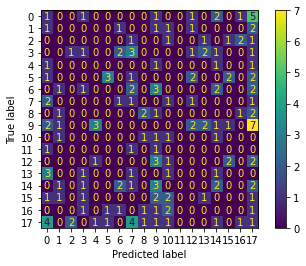

9     19
17    18
3     12
14    12
0     12
5     11
6     11
12     9
15     9
16     8
2      7
7      7
8      7
1      7
13     7
10     5
4      4
11     3
Name: Type1, dtype: int64
9     19
17    18
3     12
14    12
0     12
5     11
6     11
12     9
15     9
16     8
2      7
7      7
8      7
1      7
13     7
10     5
4      4
11     3
Name: Type1, dtype: int64


In [8]:
#collect the columns names for non-target features
result = []
for x in holdoutdf.columns:
    if (x == 'attack') or (x == 'defense') or (x == 'speed') or (x == 'sp_defense') or (x == 'sp_attack') or (x == 'weight_kg') or (x == 'height_m') or (x == 'hp'):
        result.append(x)

#get data (often called X) and target (often calle y) and display its shape
X = holdoutdf[result].values
y = holdoutdf['Type1'].values
print(X.shape)
print(y.shape)

y = keras.utils.to_categorical(holdoutdf['Type1'].to_numpy())

print(y.shape)

model = save_and_load.model_loader(path, "seqKFold")

pred = model.predict(X)

pred = np.argmax(pred,axis=1)

y_compare = np.argmax(y,axis=1) 
score = metrics.accuracy_score(y_compare, pred)

# print the accuracy of the model
print("Accuracy score: {}".format(score))

#plot a confusion matrix for the predicitons
cm = confusion_matrix(y_compare, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#list the encoded labels and string labels (temporary solution until we find out how to decode labels)
print(holdoutdf['Type1'].value_counts())
print(decodeddf['Type1'][722:890].value_counts())